<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/GA01_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyompa #install latest version of pyompa

  Created wheel for pyompa: filename=pyompa-0.3.0.3-cp36-none-any.whl size=18177 sha256=33df0899b43db246e95fb6de2b55cded9c8e8b4e3ca6c3d433bf00ea8f29e850
  Stored in directory: /root/.cache/pip/wheels/21/6c/d8/e24026ed9ecaeffaae7f5dbdee35cae1280263e1cdc6aeb15c
Successfully built pyompa


In [2]:
#upload the data files
!ls

endmember_ga01.csv  ga01_obs.csv  sample_data


In [15]:
pd.read_csv("endmember_ga01.csv")

,watermass_name,potential_temp,practical_salinity,silicate,nitrate,phosphate,oxygen,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,ENACW16,16.00,36.200,1.723311,0.0,0.00,257.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENACW12,12.30,35.660,1.233794,7.2,0.31,250.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SAIW6,6.00,34.700,5.728544,13.2,0.86,283.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAIW4,4.50,34.800,1.333989,0.0,0.05,293.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPMW7,7.07,35.160,4.422143,13.7,1.06,272.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SPMW8,8.00,35.230,1.986845,10.9,0.68,286.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IrSPMW,5.00,35.014,5.966759,15.0,0.98,307.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,LSW,3.00,34.870,8.400000,16.5,1.05,283.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MW,11.74,36.500,4.751455,10.9,0.70,210.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ISOW,2.60,34.980,12.530811,15.5,1.20,276.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#sanity checks
import pandas as pd
orig_obs = pd.read_csv("ga01_obs.csv")[['Latitude', 'Longitude', 'Depth', 'potential_temp', 'practical_salinity', 'oxygen', 'silicate', 'nitrate']]
print("Num rows:", len(orig_obs))
obs_without_na = orig_obs.dropna()
print("Num rows:", len(obs_without_na))
obs_without_na.to_csv("ga01_obsnona.csv")

Num rows: 1322
Num rows: 1321


In [26]:
config_file_contents = """
[observations]
csv_file = "ga01_obsnona.csv"
na_values = -999

[endmembers]
csv_file = "endmember_ga01.csv"
endmember_name_column = "watermass_name"

[params.potential_temp]
weight = 56.0
remineralized = false

[params.practical_salinity]
weight = 80.0
remineralized = false

[params.silicate]
weight = 3.0
remineralized = true
ratios = [0.08333333333]

[params.nitrate]
weight = 5.0
remineralized = true
ratios = [0.09523809523]

[params.oxygen]
weight = 1.0
remineralized = true
ratios = [-1]

[export]
csv_output_name="ompa_soln.csv"
orig_cols_to_include = ["Latitude", "Longitude", "Depth"]
export_orig_param_vals=true 
export_residuals=true 
export_endmember_fracs=true 
export_oxygen_deficit=true
export_conversion_ratios=true

"""

with open("config_file.txt", "w") as f:
  f.write(config_file_contents)


In [27]:
from pyompa.parse_config import run_ompa_given_toml_config_file

#Find the ompa solution using the configuration file
ompa_soln = run_ompa_given_toml_config_file("config_file.txt")

Received Config:
{
    "observations": {
        "csv_file": "ga01_obsnona.csv",
        "na_values": -999
    },
    "endmembers": {
        "csv_file": "endmember_ga01.csv",
        "endmember_name_column": "watermass_name"
    },
    "params": {
        "potential_temp": {
            "weight": 56.0,
            "remineralized": false
        },
        "practical_salinity": {
            "weight": 80.0,
            "remineralized": false
        },
        "silicate": {
            "weight": 3.0,
            "remineralized": true,
            "ratios": [
                0.08333333333
            ]
        },
        "nitrate": {
            "weight": 5.0,
            "remineralized": true,
            "ratios": [
                0.09523809523
            ]
        },
        "oxygen": {
            "weight": 1.0,
            "remineralized": true,
            "ratios": [
                -1
            ]
        }
    },
    "export": {
        "csv_output_name": "ompa_soln.csv",
  

Plotting endmember fractions


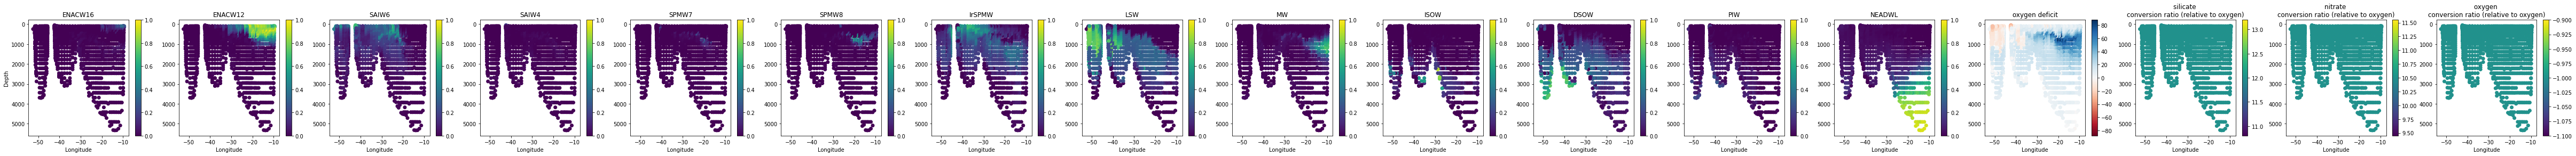

Plotting residuals


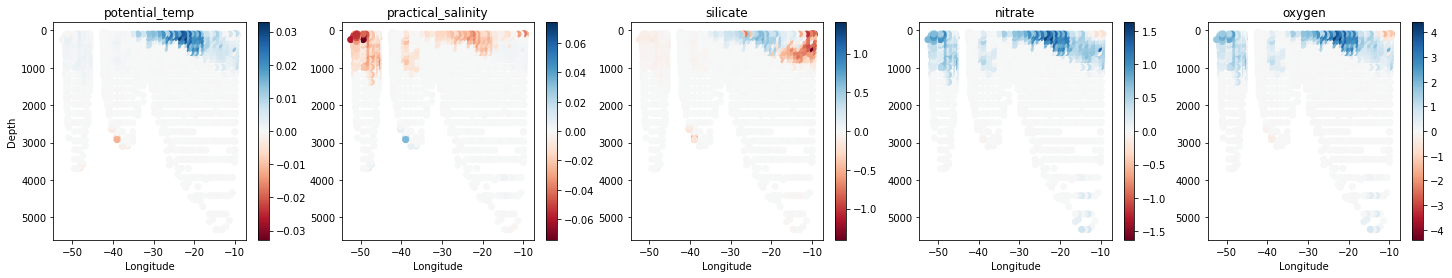

In [28]:
#Do some plotting
from pyompa import (plot_ompasoln_endmember_fractions,
                    plot_ompasoln_residuals,
                    plot_ompasoln_endmember_usagepenalties)

XAXIS_COLNAME = "Longitude"
YAXIS_COLNAME = "Depth"

if (len(ompa_soln.endmembername_to_usagepenalty) > 0):
    #plot usage penalties if applicable
    print("Plotting endmember usage penalties")
    plot_ompasoln_endmember_usagepenalties(
        ompa_soln, xaxis_colname=XAXIS_COLNAME,
        yaxis_colname=YAXIS_COLNAME)

print("Plotting endmember fractions")
plot_ompasoln_endmember_fractions(ompa_soln, xaxis_colname=XAXIS_COLNAME,
                                  yaxis_colname=YAXIS_COLNAME)
print("Plotting residuals")
plot_ompasoln_residuals(ompa_soln, xaxis_colname=XAXIS_COLNAME,
                        yaxis_colname=YAXIS_COLNAME)

In [29]:
from pyompa import build_altair_viz

#Build an interactive altair visualization
build_altair_viz(ompa_soln, xaxis_colname="Longitude", yaxis_colname="Depth" )

alt.VConcatChart(...)